In [1]:
!pip install scikit-learn numpy matplotlib tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras import layers, models
import time

In [6]:
tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

# Print information about the training data
print("Training data shape:", x_train.shape)  # Shape of the training images
print("Training labels shape:", y_train.shape)  # Shape of the training labels
print("Number of training samples:", x_train.shape[0])
print("Number of test samples:", x_test.shape[0])

# Print information about the test data
print("Test data shape:", x_test.shape)  # Shape of the test images
print("Test labels shape:", y_test.shape)  # Shape of the test labels

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Number of training samples: 60000
Number of test samples: 10000
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


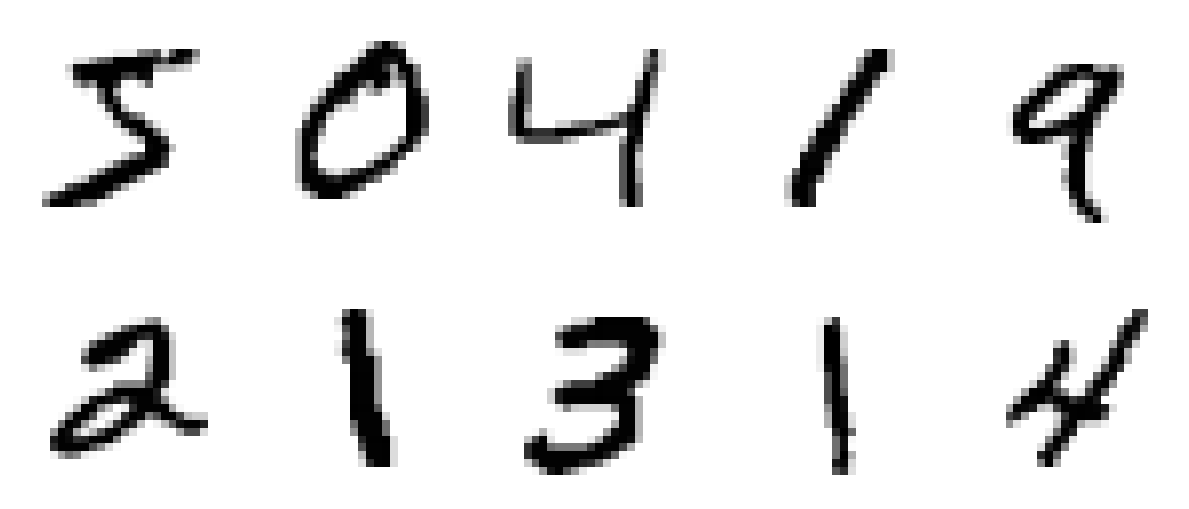

In [10]:
# Fourth cell - Display images
def display_images(X):
    """Q3: Display top 10 images"""
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.ravel()

    for idx, ax in enumerate(axes):
        image = X[idx].reshape(28, 28)
        ax.imshow(image, cmap=plt.cm.binary)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

display_images(x_train)

In [14]:
# Preprocess data
def preprocess_data(x_train):
    """Q4: Scale features"""
    # Reshape the input data to 2D: (num_samples, num_features)
    num_samples = x_train.shape[0]
    num_features = x_train.shape[1] * x_train.shape[2]
    x_train_reshaped = x_train.reshape(num_samples, num_features)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(x_train_reshaped) # Fit and transform the reshaped data
    return X_scaled

X_scaled = preprocess_data(x_train)

In [15]:
# Sixth cell - Train basic FFN
def train_ffn(X_train, X_test, y_train, y_test, hidden_layer_sizes=(64,), max_iter=10):
    """Q7: Train FFN"""
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter)
    mlp.fit(X_train, y_train)

    # Q8: Evaluate model
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

In [17]:
# Split data and train
# Assign y_train to y to use it for splitting
y = y_train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)
accuracy, precision, recall, f1 = train_ffn(X_train, X_test, y_train, y_test)

print(f"Basic FFN Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Basic FFN Results:
Accuracy: 0.9653
Precision: 0.9653
Recall: 0.9653
F1 Score: 0.9652


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


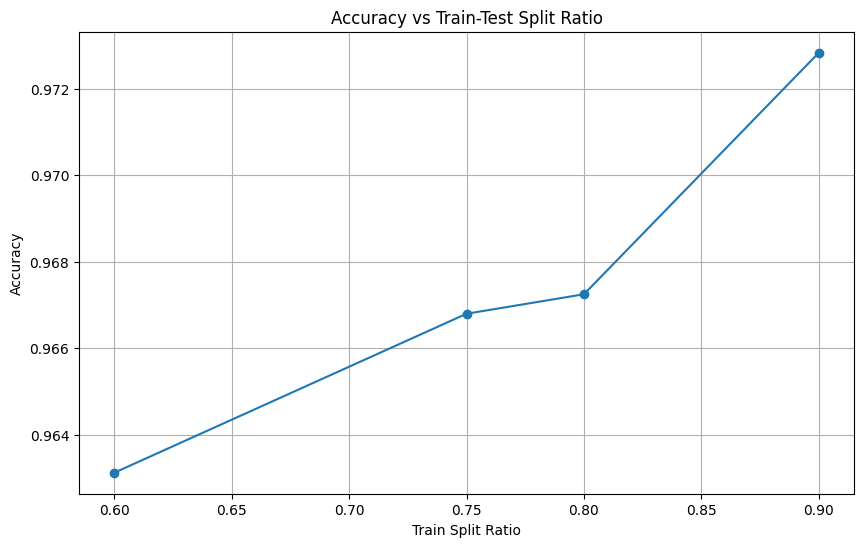


Split Results:
Train split 0.60: Accuracy 0.9631
Train split 0.75: Accuracy 0.9668
Train split 0.80: Accuracy 0.9673
Train split 0.90: Accuracy 0.9728


In [18]:

# Seventh cell - Compare different splits
def compare_splits():
    """Q9: Compare different train-test splits"""
    splits = [0.6, 0.75, 0.8, 0.9]
    accuracies = []

    for train_size in splits:
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, train_size=train_size, random_state=42
        )
        accuracy, _, _, _ = train_ffn(X_train, X_test, y_train, y_test)
        accuracies.append(accuracy)

    plt.figure(figsize=(10, 6))
    plt.plot(splits, accuracies, marker='o')
    plt.xlabel('Train Split Ratio')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Train-Test Split Ratio')
    plt.grid(True)
    plt.show()

    return dict(zip(splits, accuracies))

split_results = compare_splits()
print("\nSplit Results:")
for split, acc in split_results.items():
    print(f"Train split {split:.2f}: Accuracy {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


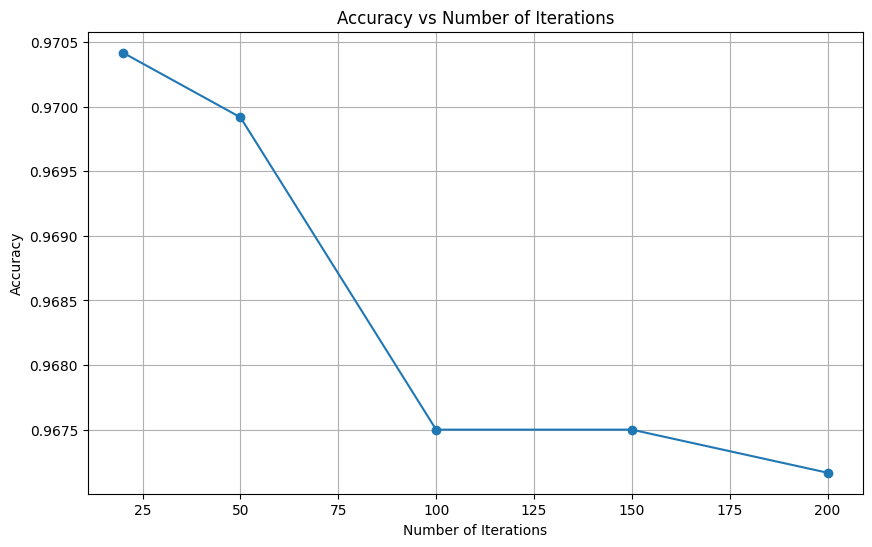


Iteration Results:
Iterations 20: Accuracy 0.9704
Iterations 50: Accuracy 0.9699
Iterations 100: Accuracy 0.9675
Iterations 150: Accuracy 0.9675
Iterations 200: Accuracy 0.9672


In [19]:
# Eighth cell - Compare iterations
def compare_iterations():
    """Q10: Compare different iteration counts"""
    iterations = [20, 50, 100, 150, 200]
    accuracies = []

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

    for max_iter in iterations:
        accuracy, _, _, _ = train_ffn(X_train, X_test, y_train, y_test, max_iter=max_iter)
        accuracies.append(accuracy)

    plt.figure(figsize=(10, 6))
    plt.plot(iterations, accuracies, marker='o')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of Iterations')
    plt.grid(True)
    plt.show()

    return dict(zip(iterations, accuracies))

iteration_results = compare_iterations()
print("\nIteration Results:")
for iters, acc in iteration_results.items():
    print(f"Iterations {iters}: Accuracy {acc:.4f}")

In [20]:
# Ninth cell - Part 2: Neural Network with Keras
def create_model(layer_config, activation='relu'):
    """Create a neural network model with specified configuration"""
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    for nodes in layer_config:
        model.add(layers.Dense(nodes, activation=activation))

    model.add(layers.Dense(10, activation='softmax'))
    return model

def train_and_evaluate(model, X_train, X_test, y_train, y_test, epochs=10):
    """Train and evaluate a model"""
    start_time = time.time()

    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                       epochs=epochs,
                       validation_data=(X_test, y_test),
                       verbose=1)

    training_time = time.time() - start_time

    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'training_time': training_time,
        'parameters': model.count_params(),
        'history': history.history
    }

In [21]:
# Tenth cell - Experiment with different numbers of nodes
def experiment_nodes():
    """Experiment with different numbers of nodes"""
    node_configs = [4, 32, 64, 128, 512, 2056]
    results = []

    # Reshape data for Keras
    X = X_scaled.reshape(-1, 28, 28)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

    for nodes in node_configs:
        print(f"\nTraining model with {nodes} nodes...")
        model = create_model([nodes])
        result = train_and_evaluate(model, X_train, X_test, y_train, y_test)
        results.append((nodes, result))

    return results

node_results = experiment_nodes()
print("\nNode Configuration Results:")
for nodes, result in node_results:
    print(f"\nNodes: {nodes}")
    print(f"Train Accuracy: {result['train_accuracy']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Training Time: {result['training_time']:.2f} seconds")
    print(f"Parameters: {result['parameters']}")



Training model with 4 nodes...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4907 - loss: 1.5297 - val_accuracy: 0.7477 - val_loss: 0.8313
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7633 - loss: 0.7943 - val_accuracy: 0.7989 - val_loss: 0.6954
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8113 - loss: 0.6601 - val_accuracy: 0.8302 - val_loss: 0.6255
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8359 - loss: 0.5927 - val_accuracy: 0.8458 - val_loss: 0.5781
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8480 - loss: 0.5438 - val_accuracy: 0.8474 - val_loss: 0.5580
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8563 - loss: 0.5204 - val_accuracy: 0.8513 - val_loss: 0.5477
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8555 - loss: 0.5101 - val_accuracy: 0.8543 - val_loss: 0.5324
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8583 - loss: 0.5037 - 

In [22]:
# Eleventh cell - Experiment with different numbers of layers
def experiment_layers():
    """Experiment with different numbers of layers"""
    layer_configs = [
        [64] * 4,
        [64] * 5,
        [64] * 6,
        [64] * 8,
        [64] * 16
    ]
    results = []

    # Reshape data for Keras
    X = X_scaled.reshape(-1, 28, 28)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

    for config in layer_configs:
        print(f"\nTraining model with {len(config)} layers...")
        model = create_model(config)
        result = train_and_evaluate(model, X_train, X_test, y_train, y_test)
        results.append((len(config), result))

    return results

layer_results = experiment_layers()
print("\nLayer Configuration Results:")
for layers, result in layer_results:
    print(f"\nLayers: {layers}")
    print(f"Train Accuracy: {result['train_accuracy']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Training Time: {result['training_time']:.2f} seconds")
    print(f"Parameters: {result['parameters']}")



Training model with 4 layers...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8378 - loss: 0.5171 - val_accuracy: 0.9483 - val_loss: 0.1656
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9598 - loss: 0.1314 - val_accuracy: 0.9589 - val_loss: 0.1436
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9708 - loss: 0.0933 - val_accuracy: 0.9622 - val_loss: 0.1297
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9789 - loss: 0.0688 - val_accuracy: 0.9606 - val_loss: 0.1534
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9817 - loss: 0.0563 - val_accuracy: 0.9631 - val_loss: 0.1503
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9852 - loss: 0.0463 - val_accuracy: 0.9673 - val_loss: 0.1355
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9877 - loss: 0.0368 - val_accuracy: 0.9648 - val_loss: 0.1519
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - a

In [24]:
# Ninth cell - Part 2: Neural Network with Keras
import tensorflow as tf  # Make sure tensorflow is imported

def create_model(layer_config, activation='relu'):
    """Create a neural network model with specified configuration"""
    model = tf.keras.models.Sequential()  # Use tf.keras.models.Sequential
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # Use tf.keras.layers.Flatten

    for nodes in layer_config:
        model.add(tf.keras.layers.Dense(nodes, activation=activation))  # Use tf.keras.layers.Dense

    model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Use tf.keras.layers.Dense
    return model

# ... (rest of your code)

In [25]:
# Twelfth cell - Experiment with different activation functions
def experiment_activations():
    """Experiment with different activation functions"""
    activations = ['relu', 'tanh', 'sigmoid']
    results = []

    # Reshape data for Keras
    X = X_scaled.reshape(-1, 28, 28)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

    for activation in activations:
        print(f"\nTraining model with {activation} activation...")
        model = create_model([64, 64, 64], activation=activation)
        result = train_and_evaluate(model, X_train, X_test, y_train, y_test)
        results.append((activation, result))

    return results

activation_results = experiment_activations()
print("\nActivation Function Results:")
for activation, result in activation_results:
    print(f"\nActivation: {activation}")
    print(f"Train Accuracy: {result['train_accuracy']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Training Time: {result['training_time']:.2f} seconds")
    print(f"Parameters: {result['parameters']}")


Training model with relu activation...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8569 - loss: 0.4802 - val_accuracy: 0.9473 - val_loss: 0.1770
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9637 - loss: 0.1193 - val_accuracy: 0.9521 - val_loss: 0.1635
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9746 - loss: 0.0832 - val_accuracy: 0.9625 - val_loss: 0.1337
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9809 - loss: 0.0617 - val_accuracy: 0.9607 - val_loss: 0.1561
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9829 - loss: 0.0530 - val_accuracy: 0.9638 - val_loss: 0.1543
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9872 - loss: 0.0411 - val_accuracy: 0.9693 - val_loss: 0.1348
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9888 - loss: 0.0331 - val_accuracy: 0.9684 - val_loss: 0.1437
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0257